In [213]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt
from siamese_network import SiameseNetworkConv
from torch import nn
from training_utils import train_one_epoch, validate

In [227]:
data = np.load('data/siamese_data_cleaned.npy')
data = torch.from_numpy(data)

dataset = TensorDataset(data)

SUBSELECT_TO_DEBUG = 1000
batch_size = 4096

indices = np.arange(len(data))[:SUBSELECT_TO_DEBUG]
np.random.shuffle(indices)

train_indices = indices[:int(0.8*len(indices))]
val_indices = indices[int(0.8*len(indices)):int(0.85*len(indices))]
test_indices = indices[int(0.85*len(indices)):]

dataset_train = Subset(dataset, train_indices)
dataset_val = Subset(dataset, val_indices)
dataset_test = Subset(dataset, test_indices)

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

len(dataset_train), len(dataset_val), len(dataset_test)

(800, 50, 150)

In [228]:
EPOCHS = 100
losses = []
train_accuracies = []
val_accuracies = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}")
net = SiameseNetworkConv()
net.to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
criterion = nn.BCELoss()
# number of params
print("Number of params:", sum(p.numel() for p in net.parameters() if p.requires_grad))
initial_train_accuracy = validate(net, dataloader_train, device)
initial_train_accuracy

Using device cuda
Number of params: 1561333


array([0.48875])

Epoch 0, loss: 0.1070631742477417, train accuracy: [0.96625], val accuracy: [0.5]
Epoch 50, loss: 0.12553910911083221, train accuracy: [0.9575], val accuracy: [0.5]
Epoch 100, loss: 0.14309929311275482, train accuracy: [0.95125], val accuracy: [0.62]
Epoch 150, loss: 0.12694518268108368, train accuracy: [0.95125], val accuracy: [0.5]
Epoch 200, loss: 0.11917084455490112, train accuracy: [0.965], val accuracy: [0.54]
Epoch 250, loss: 0.1161162257194519, train accuracy: [0.96125], val accuracy: [0.52]
Epoch 300, loss: 0.11119900643825531, train accuracy: [0.95875], val accuracy: [0.54]
Epoch 350, loss: 0.12032080441713333, train accuracy: [0.9625], val accuracy: [0.6]
Epoch 400, loss: 0.10563817620277405, train accuracy: [0.96125], val accuracy: [0.52]
Epoch 450, loss: 0.10286145657300949, train accuracy: [0.96375], val accuracy: [0.56]
Epoch 500, loss: 0.1264403760433197, train accuracy: [0.95125], val accuracy: [0.48]
Epoch 550, loss: 0.10958978533744812, train accuracy: [0.965], val a

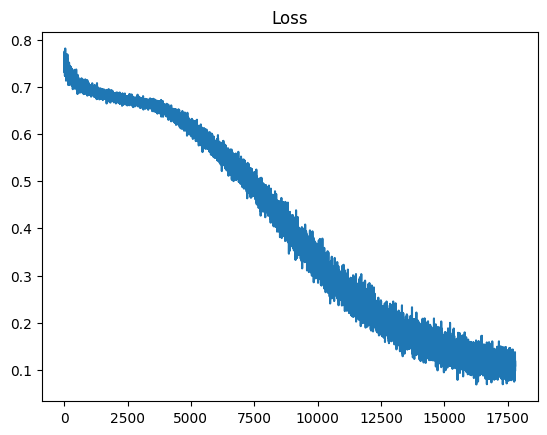

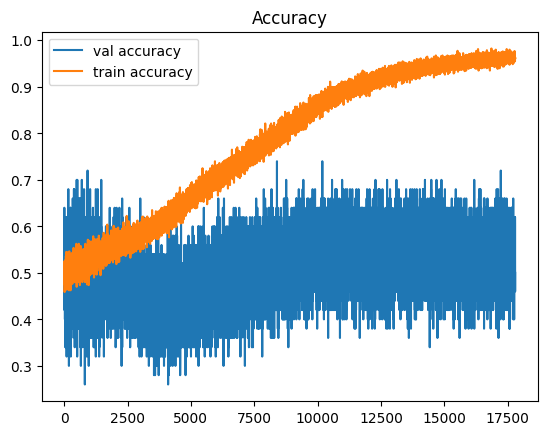

In [246]:
for i in range(20):
    for epoch in range(EPOCHS):
        loss, train_accuracy = train_one_epoch(net, dataloader_train, optimizer, criterion, device)
        val_accuracy = validate(net, dataloader_val, device)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        losses.append(loss)
        if epoch % 50 == 0:
            print(f"Epoch {epoch+EPOCHS*i}, loss: {loss}, train accuracy: {train_accuracy}, val accuracy: {val_accuracy}")

plt.plot(losses, label='loss')
plt.title('Loss')
plt.show()
plt.plot(val_accuracies, label='val accuracy')
plt.plot(train_accuracies, label='train accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()